# **Basic Python**

### **I have written comments in the code to explain what each part does.**

## 1.a 
Give a function F that takes a single argument n. This function should print a sequence of n strings as described in the examples below: <br>
Ex: **n = 3**

--A--<br>
-BAB-<br>
CBABC<br>

**n = 4**

---A---<br>
--BAB--<br>
-CBABC-<br>
DCBABCD

In [1]:
def F(n):
    for i in range(n):
        sequence = ""
        for k in range(2 * i + 1):
            sequence += chr(65 + abs(k - i))       #65 is the ASCII value of 'A'
        print('-' * (n - i - 1) + sequence + '-' * (n - i - 1))   #This will create given patteren 

F(10)
F(6)

---------A---------
--------BAB--------
-------CBABC-------
------DCBABCD------
-----EDCBABCDE-----
----FEDCBABCDEF----
---GFEDCBABCDEFG---
--HGFEDCBABCDEFGH--
-IHGFEDCBABCDEFGHI-
JIHGFEDCBABCDEFGHIJ
-----A-----
----BAB----
---CBABC---
--DCBABCD--
-EDCBABCDE-
FEDCBABCDEF


## 1.b
Make a function F that takes only one argument, a dictionary(dict) d.
The keys of d are integers and the values of d are a tuple of type (x (int), y (int)).
You must print out the dict in the format "-key-, -x-, -y-" with each entry in a new line. Print it for each of the three sorted orders, by key values ascending, by x values descending, by y values ascending.

In [2]:
def F(d):
    print("Sorted by key (ascending):")  
    for key in sorted(d):      
        
        print(f"{key}, {d[key][0]}, {d[key][1]}")  

    print("\nSorted by x (descending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][0], reverse=True):
        print(f"{key}, {x}, {y}")   

    print("\nSorted by y (ascending):")
    for key, (x, y) in sorted(d.items(), key=lambda item: item[1][1]):      
        print(f"{key}, {x}, {y}")
F({1 : (1, 2), 2 : (-1, 4), 5 : (-4, 3), 4 : (2, 3)})
print()
F({-8 : (4, 2), 6 : (-3, 4), 7 : (2, 1), 5 : (9, -10)})

Sorted by key (ascending):
1, 1, 2
2, -1, 4
4, 2, 3
5, -4, 3

Sorted by x (descending):
4, 2, 3
1, 1, 2
2, -1, 4
5, -4, 3

Sorted by y (ascending):
1, 1, 2
5, -4, 3
4, 2, 3
2, -1, 4

Sorted by key (ascending):
-8, 4, 2
5, 9, -10
6, -3, 4
7, 2, 1

Sorted by x (descending):
5, 9, -10
-8, 4, 2
7, 2, 1
6, -3, 4

Sorted by y (ascending):
5, 9, -10
7, 2, 1
-8, 4, 2
6, -3, 4


## 2 Working with Student Records

Use the data in **student_records.csv** to complete the given tasks. Do not include any external libraries. Use a Python dictionary if required.

### Reference
- [Python Dictionaries](https://www.w3schools.com/python/python_dictionaries.asp)


#### 2.a: open the student_records.csv file and print out the first 10 rows

In [3]:
import pandas as pd
# Read the CSV file into a DataFrame
df = pd.read_csv('/Users/manish/Data Visualisation/Markdown/student_records-2.csv')     #This is the current address of that file

# Print the first 10 rows
print(df.head(10))

   roll_number department  credit course_name      course_type grade
0       588946         MA       3       EC250  hasmed_elective    AB
1       145372         EP       4       EP407  hasmed_elective    CC
2       834515         MA       8       EP885  hasmed_elective    BB
3       344265        CSE       6      CSE699          honours    AB
4       358405         MA       3       EE460            minor    AP
5       781075         CE       8       CE540          honours    CC
6       180828        CSE       6       CE880            minor    AB
7       981238         MM       4      CSE226            minor    AB
8       836881         MM       8       MM530             core    AA
9       310604         EE       8       EE202             core    AB


#### 2.b: Print out the total credits and calculte CPI of each student. 
CPI is the weighted average of core courses, and electives (weights being the letter grades converted to number AP,AA=10, AB=9, BB=8, BC=7, CC=6)

In [4]:
import pandas as pd
df = pd.read_csv('/Users/manish/Data Visualisation/Markdown/student_records-2.csv')

g = {'AP': 10, 'AA': 10, 'AB': 9, 'BB': 8, 'BC': 7, 'CC': 6}
df['gn'] = df['grade'].map(g)

course = ['core', 'hasmed_elective']

df_filtered = df[df['course_type'].isin(course)]
df_filtered['ws'] = df_filtered['credit'] * df_filtered['gn']

New_df = df_filtered.groupby('roll_number').agg(totalcredit=('credit', 'sum'), totalscore=('ws', 'sum'))
New_df['cpi'] = New_df['totalscore'] / New_df['totalcredit']
New_df.reset_index(inplace=True)
print(New_df)

    roll_number  totalcredit  totalscore       cpi
0        124663           59         498  8.440678
1        138296           28         227  8.107143
2        143142           70         596  8.514286
3        143856           70         609  8.700000
4        144528           56         481  8.589286
..          ...          ...         ...       ...
95       981238           93         784  8.430108
96       986057           56         438  7.821429
97       993835           27         238  8.814815
98       995208           49         385  7.857143
99       998293           64         571  8.921875

[100 rows x 4 columns]


/var/folders/wq/qy2mxf5n0xz3xq9pw609dfgw0000gp/T/ipykernel_45743/2121589077.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['ws'] = df_filtered['credit'] * df_filtered['gn']


#### 2.c: Print out the names of all students who meet the graduation requirements 
Atleast 20 credist of core course, 15 credits of department elective, 10 credits of flexible elective and 5 credits of hasmed electives

In [5]:
import pandas as pd
data = pd.read_csv('/Users/manish/Data Visualisation/Markdown/student_records-2.csv')
req = {'core': 20, 'department_elective': 15, 'flexible_elective': 10, 'hasmed_elective': 5}
credits = data.groupby(['roll_number', 'course_type'])['credit'].sum().unstack(fill_value=0)
qualified = credits[
    (credits.get('core', 0) >= req['core']) &
    (credits.get('department_elective', 0) >= req['department_elective']) &
    (credits.get('flexible_elective', 0) >= req['flexible_elective']) &
    (credits.get('hasmed_elective', 0) >= req['hasmed_elective'])
]
print("Students meeting graduation requirements:")
print(qualified.index.tolist())

Students meeting graduation requirements:
[124663, 143142, 143856, 144528, 150503, 159438, 180828, 203200, 207443, 214270, 265922, 282482, 283796, 294697, 310604, 327122, 362471, 379479, 381227, 388969, 391848, 461971, 482623, 485484, 488661, 500658, 517837, 521087, 534763, 571782, 572815, 581065, 581858, 588946, 608522, 608952, 626000, 628849, 630568, 681499, 692318, 703403, 716985, 721490, 750259, 773982, 781075, 782129, 787967, 810863, 834515, 836881, 845623, 871746, 879634, 881983, 888886, 928288, 955757, 960395, 970791, 971123, 973158, 981238, 986057, 998293]


#### 2.d: Print out the names of all students who completed a minor 
Atleast 10 credits with minor tag in a specific department

In [6]:
#TODO

import pandas as pd
data_frame = pd.read_csv('/Users/manish/Data Visualisation/Markdown/student_records-2.csv')

minor_courses = data_frame[data_frame['course_type'] == 'minor']

minor_credits = minor_courses.groupby(['roll_number', 'department'])['credit'].sum().reset_index()

# Filter students who have completed at least 10 credits in a minor
students_with_minor = minor_credits[minor_credits['credit'] >= 10]

print(students_with_minor)


    roll_number department  credit
0        124663         EE      37
1        138296         MM      29
2        143142        CSE      30
3        143856         CE      35
4        144528         ME      23
..          ...        ...     ...
95       981238         MM      22
96       986057         ME      13
97       993835         CE      34
98       995208         ME      24
99       998293         ME      12

[96 rows x 3 columns]


#### 2.e: Print out the names of all students who completed a honours
Atleast 10 credits with honours tag and 20 core credits

In [7]:
import pandas as pd


honors = data_frame[data_frame['course_type'] == 'honors']
core= data_frame[data_frame['course_type'] == 'core']


honors_credits = honors.groupby('roll_number')['credit'].sum()
core_credits = core.groupby('roll_number')['credit'].sum()


credits = pd.DataFrame({'honors_credits': honors_credits, 'core_credits': core_credits})


students_with_honors = credits[(credits['honors_credits'] >= 10) &(credits['core_credits'] >= 20)]

# Displaying  the roll numbers of students who meet the criteria
print("Students who completed honors:")
print(students_with_honors.reset_index())


Students who completed honors:
Empty DataFrame
Columns: [roll_number, honors_credits, core_credits]
Index: []


# **SciPy** 

## Part A
Minimize the function $f(x, y) = 2(x - y - 3)^2 + 4(x + 2y + 1)^4$.<br>
With the constraints : $ x - y \ge -3, (x + 2)^2 + (y + 1)^2 \le 5$ <br>
Using scipy.optimize.minimize with constraints. (Hint: Look at the examples in the official documentation)

In [8]:
#TODO

from scipy.optimize import minimize

def f(xy):
    x, y = xy
    return 2*(x - y - 3)**2 + 4*(x + 2*y + 1)**4

def constraint1(xy):
    x, y = xy
    return x - y + 3

def constraint2(xy):
    x, y = xy
    return 5 - (x + 2)**2 - (y + 1)**2

cons = [{'type': 'ineq', 'fun': constraint1},
        {'type': 'ineq', 'fun': constraint2}]

res = minimize(f, [0, 0], constraints=cons)

print("Points at which fuc. is min:", res.x)
print("function min value:", res.fun)


Points at which fuc. is min: [ 0.23492503 -0.92851489]
function min value: 7.345026216977382


# Part B
Evaluate the line integral of the function $f(x, y) = x^2 + y^4$ along the circle $ x^2 + y^2 = 3 $ anticlockwise (scalar integral, not vector). You must use scipy for integration but you may use parameterization

In [9]:
import numpy as np
from scipy.integrate import quad

def f(x, y):
    return x**2 + y**4

def x(t):
    return np.sqrt(3) * np.cos(t)

def y(t):
    return np.sqrt(3) * np.sin(t)

def integrand(t):
    return (x(t))**2 + (y(t))**4 * np.sqrt(3)

result, error = quad(integrand, 0, 2*np.pi)
print(result)

46.15421508651228


# **Numpy**

### Read Lisan_Al_Gaib.pdf for problem description and complete the following functions

In [10]:
import time # to time the execution
import numpy as np
import matplotlib.pyplot as plt

In [11]:
### TODO 1
### Load data from data_path
### Check the input file spice_locations.txt to understand the Data Format
### Return : np array of size Nx2
def load_data(file_path):
    try:
        return np.genfromtxt(file_path, delimiter=",")
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

def main():
    file_path = 'spice_locations.txt'
    spice_data = load_data(file_path)
    if spice_data is not None:
        print(spice_data)

file_path=pd.read_csv('/Users/manish/Data Visualisation/Markdown/spice_locations.txt')
if __name__ == "__main__":
    main()

[[-2.12729941e+00  1.75357153e+00]
 [-3.40030291e-01 -6.70757901e-03]
 [-3.21990680e+00 -2.22002740e+00]
 [-3.70958194e+00  1.33088073e+00]
 [-9.94424941e-01  5.40362889e-01]
 [-3.89707753e+00  1.84954926e+00]
 [ 1.62213204e-01 -1.93830445e+00]
 [-3.09087516e+00 -2.08297745e+00]
 [-2.47878879e+00 -3.76217842e-01]
 [-1.84027491e+00 -1.54385430e+00]
 [-9.40735526e-01 -2.30253070e+00]
 [-2.53927676e+00 -1.16819078e+00]
 [-1.71965008e+00  9.25879807e-01]
 [-3.00163109e+00 -4.28827808e-01]
 [-1.03792716e+00 -2.76774794e+00]
 [-9.62275740e-01 -2.14737938e+00]
 [-3.67474204e+00  1.74442769e+00]
 [ 8.28160165e-01  1.04198674e+00]
 [-2.47693115e+00 -2.51163943e+00]
 [-5.78834867e-01 -7.99237531e-01]
 [-3.38980883e+00 -5.24115449e-01]
 [-3.82805739e+00  1.54660201e+00]
 [-2.70610009e+00  3.12611422e-01]
 [-2.44144462e+00 -3.99659894e-01]
 [-1.26644860e+00 -2.07572772e+00]
 [ 8.47923139e-01  8.75664117e-01]
 [ 6.97494708e-01  1.47413675e+00]
 [-1.01050011e+00  1.60937118e+00]
 [-3.55753749e+00 -2

In [12]:
### TODO 2.1
### If init_centers is None, initialize the centers by selecting K data points at random without replacement
### Else, use the centers provided in init_centers
### Return : np array of size Kx2
def retrieve_dataset(file_location):
    try:
        return np.genfromtxt(file_location, delimiter=",")
    except FileNotFoundError:
        print(f"Error: The file '{file_location}' was not found.")
    except np.core._exceptions._ArrayMemoryError:
        print(f"Error: Insufficient memory to load the data from '{file_location}'.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def initialize_group_representatives(dataset, num_groups, predefined_representatives=None):
    if predefined_representatives is None:
        return dataset[np.random.choice(dataset.shape[0], num_groups, replace=False)]
    else:
        return predefined_representatives

# Example Usage
file_location = 'spice_locations.txt'
num_groups = 3

dataset = retrieve_dataset(file_location)
if dataset is not None:
    group_representatives = initialize_group_representatives(dataset, num_groups)
    print("Randomly Initialized Representatives:\n", group_representatives)

    predefined_representatives = np.array([[2.0, 1.0], [-3.0, -2.0], [3.5, 5.5]])
    predefined_group_representatives = initialize_group_representatives(dataset, num_groups, predefined_representatives=predefined_representatives)
    print("Predefined Representatives:\n", predefined_group_representatives)

Randomly Initialized Representatives:
 [[-1.71965008  0.92587981]
 [ 5.80392524  5.80638599]
 [-0.96227574 -2.14737938]]
Predefined Representatives:
 [[ 2.   1. ]
 [-3.  -2. ]
 [ 3.5  5.5]]


In [13]:
### TODO 2.2
### Initialize the labels to all ones to size (N,) where N is the number of data points
### Return : np array of size N


def initialise_labels(data): 
    return np.ones(data.shape[0], dtype=int) 

data_path = '/Users/manish/Data Visualisation/Markdown/spice_locations.txt' 
data = load_data(data_path) 

if data is not None: 
    labels = initialise_labels(data) 
    print("Initialized Labels:\n", labels)

Initialized Labels:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [14]:
### TODO 3.1 : E step
### For Each data point, find the distance to each center
### Return : np array of size NxK

def calculate_distances(data, centers):
    diff = data[:, np.newaxis, :] - centers[np.newaxis, :, :]
    dist = np.sqrt(np.sum(diff ** 2, axis=2))
    return dist

points = np.array([
    [-2.1273, 1.7535],
    [-0.3400, -0.0067],
    [-3.2199, -2.2200],
])

centers = np.array([
    [0.0, 0.0],
    [1.0, 1.0],
])

dist_matrix = calculate_distances(points, centers)
print("Distance Matrix:")
print(dist_matrix)

Distance Matrix:
[[2.75684014 3.21679461]
 [0.34006601 1.67602055]
 [3.91103004 5.30810286]]


In [15]:
### TODO 3.2 : E step
### For Each data point, assign the label of the nearest center
### Return : np array of size N
import numpy as np

def update_labels(distances):   
    """Assign each point to the nearest cluster."""
    clusters = np.argmin(distances, axis=1)
    return clusters

if __name__ == "__main__":
    points = np.array([
        [2.74, 3.18],
        [0.34, 1.42],
        [3.85, 4.86]
    ])

    cluster_ids = update_labels(points)
    print("Cluster IDs:", cluster_ids)

Cluster IDs: [0 0 0]


In [16]:
### TODO 4 : M step
### Update the centers to the mean of the data points assigned to it
### Return : np array of size Kx2
def update_centers(data, labels, K): 

    dimensionality = data.shape[1] 
    updated_centers = np.zeros((K, dimensionality)) 
    for cluster_index in range(K): 
        points_in_cluster = data[np.where(labels == cluster_index)] 
        if len(points_in_cluster) > 0: 
            updated_centers[cluster_index] = np.mean(points_in_cluster, axis=0) 
        else: 
            updated_centers[cluster_index] = np.zeros(dimensionality) 
    return updated_centers

if __name__ == "__main__":
    points = np.array([
        [1.0, 2.0],
        [1.5, 1.8],
        [5.0, 8.0],
        [8.0, 8.0],
        [1.0, 0.6],
        [9.0, 11.0],
    ])
    targets = np.array([0, 0, 1, 1, 0, 1])
    k = 2
    new_centers = update_centers(points, targets, k)
    print("Updated Centers:")
    print(new_centers)


Updated Centers:
[[1.16666667 1.46666667]
 [7.33333333 9.        ]]


In [17]:
### TODO 6 : Check convergence
### Check if the labels have changed from the previous iteration
### Return : True / False
def check_termination(prev, curr):
    """Check if labels have changed."""
    return not np.array_equal(prev, curr)

# Example 1: Labels have not changed
prev_labels = np.array([2, 3, 2, 3, 2])
curr_labels = np.array([2, 3, 2, 3, 2])

changed = check_termination(prev_labels, curr_labels)
print("Has changed:", changed)

# Example 2: Labels have changed
prev_labels = np.array([2, 3, 2, 3, 2])
curr_labels = np.array([2, 3, 3, 3, 2])

changed = check_termination(prev_labels, curr_labels)
print("Has changed:", changed)

Has changed: False
Has changed: True


In [18]:
### DON'T CHANGE ANYTHING IN THE FOLLOWING FUNCTION
def kmeans(data_path:str, K:int, init_centers):
    '''
    Input :
        data (type str): path to the file containing the data
        K (type int): number of clusters
        init_centers (type numpy.ndarray): initial centers. shape = (K, 2) or None
    Output :
        centers (type numpy.ndarray): final centers. shape = (K, 2)
        labels (type numpy.ndarray): label of each data point. shape = (N,)
        time (type float): time taken by the algorithm to converge in seconds
    N is the number of data points each of shape (2,)
    '''
    data = load_data(data_path)    
    centers = initialise_centers(data, K, init_centers)
    labels = initialise_labels(data)

    start_time = time.time() # Time stamp 

    while True:
        distances = calculate_distances(data, centers)
        labels_new = update_labels(distances)
        centers = update_centers(data, labels_new, K)
        if check_termination(labels, labels_new): break
        else: labels = labels_new
 
    end_time = time.time() # Time stamp after the algorithm ends
    return centers, labels, end_time - start_time 

In [19]:
### TODO 7
import numpy as np
import matplotlib.pyplot as plt

def visualise(data_path, labels, centers):
    data = load_data(data_path)

    # Scatter plot of the data points
    plt.scatter(data[:, 0], data[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

    # Set the title and axis labels
    plt.title('K-means clustering')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    # Save the plot
    plt.savefig('kmeans.png')

    ## DO NOT CHANGE THE FOLLOWING LINE
    return plt


def initialise_centers(data, K, init_centers=None):
    if init_centers is None:
        # Randomly select K data points without replacement
        centers = data[np.random.choice(data.shape[0], K, replace=False)]
    else:
        # Use the provided initial centers
        centers = init_centers
    return centers


def update_centers(data, labels, K):
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])

Time taken for the algorithm to converge: 0.0003650188446044922


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/matplotlib/pyplot.py'>

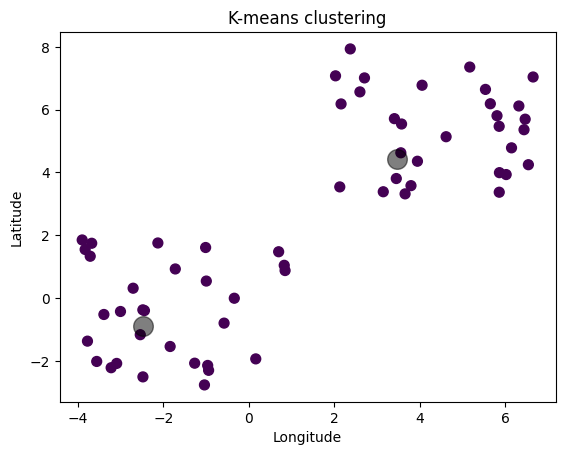

In [20]:
### After you have completed the above functions, run the following code to generate the plot
data_path = '/Users/manish/Data Visualisation/Markdown/spice_locations.txt'
K, init_centers = 2, None
centers, labels, time_taken = kmeans(data_path, K, init_centers)
print('Time taken for the algorithm to converge:', time_taken)
visualise(data_path, labels, centers)